# 数据集分析

Author: Leeasy

> 1st version: 2024/02/19 
> 2nd version: 2024/02/23
> 3rd version: 2024/02/25 

In [2]:
!pip install pandas
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 1. 数据预处理

打印有缺失值的字段

In [3]:
import pandas as pd

# 假设已经加载了数据集df
df = pd.read_csv('data-0.csv')

# 计算每个字段的缺失值数量
missing_values = df.isnull().sum()

# 找出有缺失值的字段
fields_with_missing_values = missing_values[missing_values > 0]

# 打印有缺失值的字段及其缺失数量
print("Fields with missing values:")
print(fields_with_missing_values)

Fields with missing values:
出院诊断LENTH_MAX    355
dtype: int64


说明这个数据集中仅有“出院诊断LENTH_MAX”字段有缺失值。该字段有355条记录缺失。

In [5]:
import pandas as pd

# 加载数据集
df = pd.read_csv('data-0.csv')

# 1. 缺失值处理
# 计算每个字段的缺失值数量
missing_values_count = df.isnull().sum()

# 获取记录总数
total_records = len(df)

# 删除缺失值少于5%的记录
threshold = 0.05 * total_records
df = df.dropna(axis=0, how='any', subset=missing_values_count[missing_values_count < threshold].index.to_list())

# 删除缺失值大部分的字段
df = df.drop(columns=missing_values_count[missing_values_count > threshold].index.to_list())

# 用均值填充其它缺失值
df.fillna(df.mean(), inplace=True)

# 2. 异常值处理
# 对于数值型字段，使用IQR方法识别异常值并进行截断替换
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 3. 重复项处理
# 移除数据中的重复行
df = df.drop_duplicates()

# 现在df是清洗后的DataFrame
# 如果需要可以导出到新的CSV文件
df.to_csv('cleaned_data-0.csv', index=False)

首先加载CSV文件为一个pandas DataFrame。接着对数据集进行以下步骤的清洗：

1. 计算并处理缺失值：对于每一列，我们计算缺失值的数量。如果某列的缺失值少于5%的记录总数，则删除这些记录；如果某列的缺失值超过了记录总数的5%，则删除整个列。对于其它缺失值，我们使用该字段的均值进行填充。
2. 处理异常值：我们对每个数值型字段计算四分位数和IQR，然后对值进行截断，以便异常值不会影响分析结果。
3. 移除重复项：最后，我们移除DataFrame中的重复行。

> 可视化

### 3. 异常值检测 (Outlier Detection)

- **方法**: 箱型图 (Boxplot)、散点图 (Scatter Plot)
- **目的**: 识别和比较异常值。
- **好处**: 异常值可能会对分析结果产生不利影响。通过可视化异常值，我们可以了解清洗操作是否有效地处理了这些数据点。

### 4. 重复数据检测 (Duplicate Data Detection)

- **方法**: 条形图 (Bar Chart)、计数图 (Count Plot)
- **目的**: 展示清洗前后数据集中重复记录的数量。
- **好处**: 重复数据可能会扭曲分析结果。可视化重复数据的数量可以帮助确认数据清洗过程是否成功移除或合并了这些重复项。

### 5. 关系分析 (Correlation Analysis)

- **方法**: 散点图矩阵 (Scatter Plot Matrix)、相关系数热力图 (Correlation Heatmap)
- **目的**: 研究变量之间的关系。
- **好处**: 了解变量之间的关系对于建模和预测非常重要。相关系数热力图可以展示变量间的线性关系强度，而散点图矩阵则可以直观地显示变量间的关系模式。

### 6. 维度缩减分析 (Dimensionality Reduction Analysis)

- **方法**: 主成分分析 (PCA) 可视化
- **目的**: 在减少维度后分析数据结构的变化。
- **好处**: PCA可视化有助于了解数据的内在结构，并且可以揭示清洗后数据的方差保留情况。

### 7. 数据质量评估 (Data Quality Assessment)

- **方法**: 数据分布图 (Distribution Plot)、时间序列图 (Time Series Plot)
- **目的**: 评估数据清洗对数据质量的影响。
- **好处**: 通过比较不同时间段的数据质量，我们可以评估数据清洗操作对趋势和季节性的影响。

### 8. 综合报告 (Comprehensive Reporting)

- **方法**: 仪表板 (Dashboard) 包含多种图表
- **目的**: 提供一个总体的视图来展示数据清洗前后的所有比较。

### 1. 缺失值可视化 (Missing Values Visualization)

- **方法**: 热力图 (Heatmap)、条形图 (Bar Chart)
- **目的**: 识别数据集中的缺失值分布。
- **好处**: 热力图可以快速地给出每个特征中缺失值的存在情况，而条形图可以提供每个特征缺失值的具体数量。这有助于评估数据清洗的效果，如填充缺失值或删除缺失数据。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/work/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.draw()
/home/work/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.draw()
/home/work/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from current font.
  fig.canvas.draw()
/home/work/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.draw()
findfont: Generic family 'sans-serif' not found because none of the following families were foun

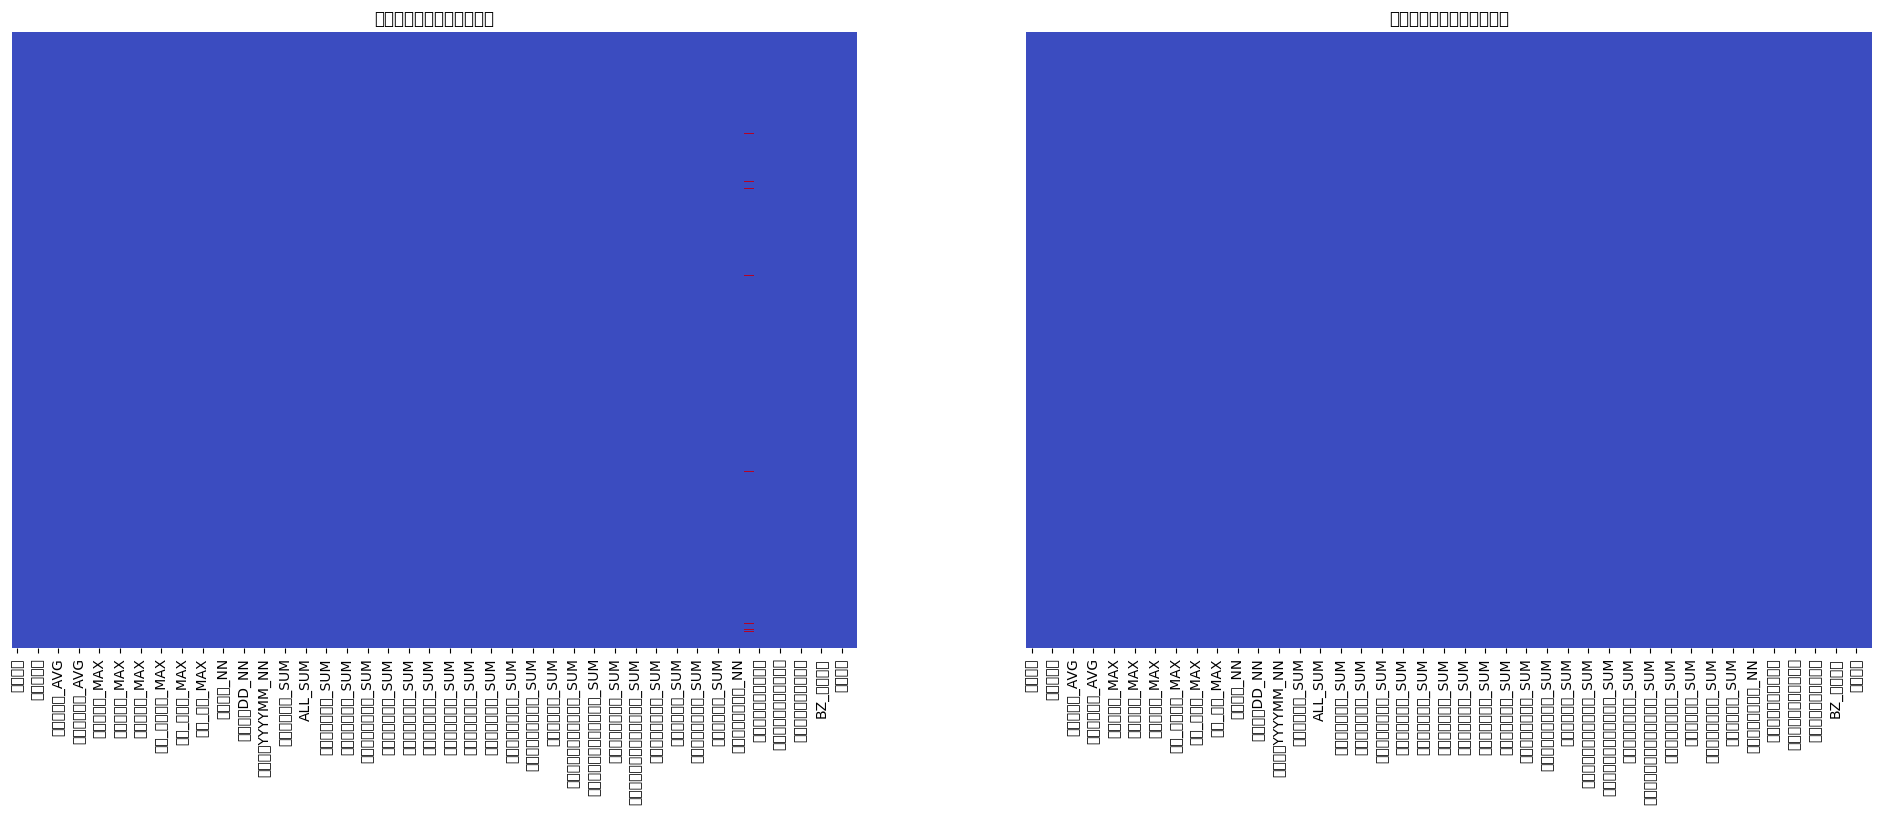

<Figure size 2000x800 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

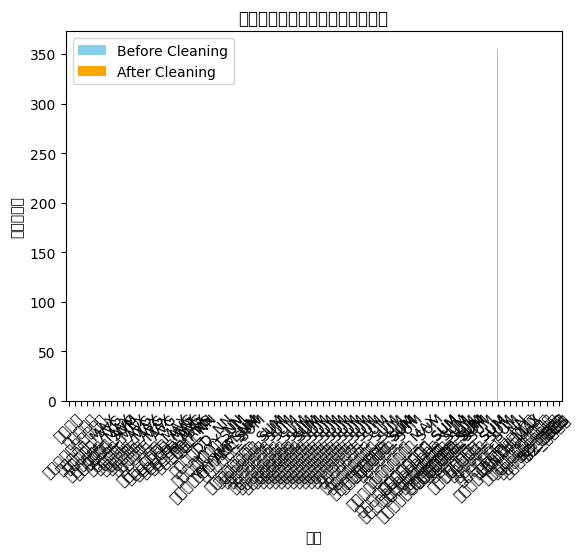

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置matplotlib支持中文字体的选项
plt.rcParams['font.sans-serif'] = ['SimHei'] # 使用宋体或者指定其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False # 确保能够显示负号

# 加载数据集
df_before = pd.read_csv('data-0.csv')
df_after = pd.read_csv('cleaned_data-0.csv')

# 生成缺失值热力图的函数
def plot_missing_values_heatmap(df_before, df_after, title_before, title_after):
    fig, axes = plt.subplots(ncols=2, figsize=(24, 8))  # 设置两列的subplot

    # 绘制清洗前数据的缺失值热力图
    sns.heatmap(df_before.isnull(), cbar=False, ax=axes[0], yticklabels=False, cmap='coolwarm')
    axes[0].set_title(title_before)

    # 绘制清洗后数据的缺失值热力图
    sns.heatmap(df_after.isnull(), cbar=False, ax=axes[1], yticklabels=False, cmap='coolwarm')
    axes[1].set_title(title_after)

    plt.show()

# 对数据清洗前后的数据集绘制热力图
plot_missing_values_heatmap(df_before, df_after, '清洗前数据的缺失值热力图', '清洗后数据的缺失值热力图')

# 生成缺失值条形图的函数
def plot_missing_values_bar_chart(df_before, df_after, title):
    # 计算每列缺失值的数量
    missing_count_before = df_before.isnull().sum()
    missing_count_after = df_after.isnull().sum()
    
    # 合并两个Series为DataFrame
    missing_df = pd.DataFrame({'Before Cleaning': missing_count_before, 'After Cleaning': missing_count_after})
    
    # 使用matplotlib绘制条形图，调整图的宽度以避免X轴标签重叠
    plt.figure(figsize=(20, 8))  # 增加图的宽度
    missing_df.plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(title)
    plt.xlabel('特征')
    plt.ylabel('缺失值数量')
    plt.legend()
    plt.xticks(rotation=45)  # 旋转X轴标签
    plt.show()

# 对数据清洗前后的数据集绘制条形图
plot_missing_values_bar_chart(df_before, df_after, '清洗前后数据的缺失值对比条形图')

### 2. 数据分布可视化 (Data Distribution Visualization)

- **方法**: 直方图 (Histogram)、箱型图 (Boxplot)、密度图 (Density Plot)
- **目的**: 比较清洗前后单个变量的数据分布。
- **好处**: 直方图和密度图可以展示数据的分布形状和偏态，箱型图则可以揭示数据的中位数、四分位数和离群值。这有助于了解数据清洗如何影响数据的分布特性。

In [13]:
print(df_before.columns)
print(df_after.columns)

Index(['个人编码', '一天去两家医院的天数', '就诊的月数', '月就诊天数_MAX', '月就诊天数_AVG', '月就诊医院数_MAX',
       '月就诊医院数_AVG', '就诊次数_SUM', '月就诊次数_MAX', '月就诊次数_AVG', '月统筹金额_MAX',
       '月统筹金额_AVG', '月药品金额_MAX', '月药品金额_AVG', '医院_就诊天数_MAX', '医院_就诊天数_AVG',
       '医院_统筹金_MAX', '医院_统筹金_AVG', '医院_药品_MAX', '医院_药品_AVG', '医院编码_NN',
       '顺序号_NN', '交易时间DD_NN', '交易时间YYYY_NN', '交易时间YYYYMM_NN', '住院天数_SUM',
       '个人账户金额_SUM', '统筹支付金额_SUM', 'ALL_SUM', '可用账户报销金额_SUM', '药品费发生金额_SUM',
       '药品费自费金额_SUM', '药品费申报金额_SUM', '贵重药品发生金额_SUM', '中成药费发生金额_SUM',
       '中草药费发生金额_SUM', '检查费发生金额_SUM', '检查费自费金额_SUM', '检查费申报金额_SUM',
       '贵重检查费金额_SUM', '治疗费发生金额_SUM', '治疗费自费金额_SUM', '治疗费申报金额_SUM',
       '手术费发生金额_SUM', '手术费自费金额_SUM', '手术费申报金额_SUM', '床位费发生金额_SUM',
       '床位费申报金额_SUM', '医用材料发生金额_SUM', '高价材料发生金额_SUM', '医用材料费自费金额_SUM',
       '成分输血申报金额_SUM', '其它发生金额_SUM', '其它申报金额_SUM', '一次性医用材料申报金额_SUM',
       '起付线标准金额_MAX', '起付标准以上自负比例金额_SUM', '医疗救助个人按比例负担金额_SUM', '最高限额以上金额_SUM',
       '基本统筹基金支付金额_SUM', '公务员医疗补助基金支付金额_SUM', '城乡救助补助金额_SUM'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置matplotlib支持中文字体的选项
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用宋体或者指定其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 确保能够显示负号

# 加载数据集
df_before = pd.read_csv('data-0.csv')
df_after = pd.read_csv('cleaned_data-0.csv')

# 数据分布可视化的函数
def data_distribution_visualization(df_before, df_after, variable_name):
    # 设置画布
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
    fig.suptitle(f'数据分布可视化 - {variable_name}', fontsize=16)

    # 直方图
    sns.histplot(df_before[variable_name].dropna(), kde=False, bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('清洗前直方图')
    sns.histplot(df_after[variable_name].dropna(), kde=False, bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('清洗后直方图')

    # 箱型图
    sns.boxplot(y=df_before[variable_name], ax=axes[1, 0], color='skyblue')
    axes[1, 0].set_title('清洗前箱型图')
    sns.boxplot(y=df_after[variable_name], ax=axes[1, 1], color='orange')
    axes[1, 1].set_title('清洗后箱型图')

    # 密度图
    sns.kdeplot(df_before[variable_name].dropna(), ax=axes[2, 0], shade=True, color='skyblue')
    axes[2, 0].set_title('清洗前密度图')
    sns.kdeplot(df_after[variable_name].dropna(), ax=axes[2, 1], shade=True, color='orange')
    axes[2, 1].set_title('清洗后密度图')

    # 调整子图间距
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 遍历所有列并为每一列生成对比图
for column in df_before.columns:
    data_distribution_visualization(df_before, df_after, column)